In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import initializers

In [2]:
import os
import zipfile

In [111]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

     class 1       0.50      0.49      0.49      1377
     class 2       0.50      0.50      0.50      1377

    accuracy                           0.50      2754
   macro avg       0.50      0.50      0.50      2754
weighted avg       0.50      0.50      0.50      2754



In [3]:
local_zip = '/content/drive/MyDrive/Cell-Img-Data/eval.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

In [4]:
local_zip = '/content/drive/MyDrive/Cell-Img-Data/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

In [5]:
local_zip = '/content/drive/MyDrive/Cell-Img-Data/valid.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

In [6]:
train_data_gen = ImageDataGenerator(rescale=1/255)
validation_data_gen = ImageDataGenerator(rescale=1/255)

train_gen = train_data_gen.flow_from_directory(
    '/content/content/train',
    target_size = (150,150),
    batch_size = 64,
    class_mode = 'binary'
)

val_gen = train_data_gen.flow_from_directory(
    '/content/content/valid',
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 20670 images belonging to 2 classes.
Found 4134 images belonging to 2 classes.


In [7]:
initializer = tf.keras.initializers.GlorotUniform()

In [8]:
model = Sequential()
model.add(layers.Conv2D(input_shape=(150, 150, 3), filters=64,kernel_size=(9,9), padding="same",activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model.add(layers.Conv2D(64, (6, 6), activation='relu', padding='same', name='block1_conv1'))
model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_initializer=initializer))
model.add(Dropout(0.5))
model.add(layers.Dense(128, activation='relu', kernel_initializer=initializer))

layer = tf.keras.layers.Dense(1, kernel_initializer=initializer, activation='sigmoid')#The Glorot uniform initializer, also called Xavier uniform initializer.
model.add(layer)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      15616     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 block1_conv1 (Conv2D)       (None, 75, 75, 64)        147520    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 256)               2

In [11]:
from tensorflow.keras.optimizers import Adam
model.compile(loss = 'binary_crossentropy',
             optimizer = 'Adam',
             metrics = ['accuracy'])

In [12]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                patience=5)

In [13]:
model_fit = model.fit(train_gen,
                      epochs = 20,
                      verbose = 1,
                      validation_data = val_gen,
                      callbacks = early_stopping)

Epoch 1/20
323/323 [==============================] - 56s 142ms/step - loss: 0.7194 - accuracy: 0.5826 - val_loss: 0.6688 - val_accuracy: 0.5965
Epoch 2/20
323/323 [==============================] - 44s 137ms/step - loss: 0.6253 - accuracy: 0.6524 - val_loss: 0.6356 - val_accuracy: 0.6505
Epoch 3/20
323/323 [==============================] - 44s 136ms/step - loss: 0.3938 - accuracy: 0.8226 - val_loss: 0.2068 - val_accuracy: 0.9352
Epoch 4/20
323/323 [==============================] - 44s 136ms/step - loss: 0.1758 - accuracy: 0.9404 - val_loss: 0.1848 - val_accuracy: 0.9398
Epoch 5/20
323/323 [==============================] - 44s 136ms/step - loss: 0.1387 - accuracy: 0.9552 - val_loss: 0.1697 - val_accuracy: 0.9378
Epoch 6/20
323/323 [==============================] - 44s 136ms/step - loss: 0.0986 - accuracy: 0.9674 - val_loss: 0.1948 - val_accuracy: 0.9335
Epoch 7/20
323/323 [==============================] - 44s 137ms/step - loss: 0.1085 - accuracy: 0.9670 - val_loss: 0.2201 - val_ac

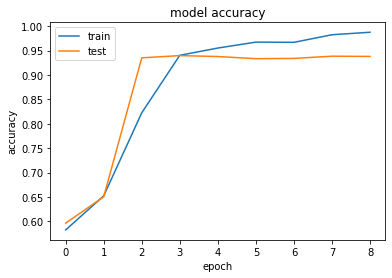

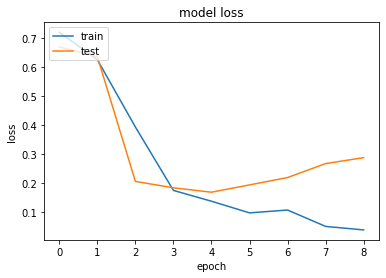

In [14]:
import matplotlib.pyplot as plt
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [104]:
eval_data_gen = ImageDataGenerator(rescale=1/255)

eval_gen = eval_data_gen.flow_from_directory(
    '/content/content/eval',
    target_size = (150,150),
    batch_size = 8,
    class_mode = 'binary'
)

Found 2754 images belonging to 2 classes.


In [124]:
score = model.evaluate(eval_gen, verbose=0)

In [125]:
print("Accuracy of evaluation data is ",score[1])

Accuracy of evaluation data is  0.9270152449607849


In [121]:
preds = model.predict(eval_gen)
class_one = preds > 0.5

345/345 [==============================] - 4s 11ms/step


In [123]:
print(classification_report(eval_gen.labels, class_one))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1377
           1       0.50      0.50      0.50      1377

    accuracy                           0.50      2754
   macro avg       0.50      0.50      0.50      2754
weighted avg       0.50      0.50      0.50      2754



In [122]:
print(confusion_matrix(eval_gen.labels, class_one))

[[682 695]
 [682 695]]


# Approach-2

**Batch size has been changed**

In [126]:
train_data_gen = ImageDataGenerator(rescale=1/255)
validation_data_gen = ImageDataGenerator(rescale=1/255)

train_gen = train_data_gen.flow_from_directory(
    '/content/content/train',
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

val_gen = train_data_gen.flow_from_directory(
    '/content/content/valid',
    target_size = (150,150),
    batch_size = 16,
    class_mode = 'binary'
)

Found 20670 images belonging to 2 classes.
Found 4134 images belonging to 2 classes.


In [127]:
model3 = Sequential()
model3.add(layers.Conv2D(input_shape=(150, 150, 3), filters=64,kernel_size=(3,3), padding="same",activation='relu'))
model3.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model3.add(layers.Conv2D(512, (6, 6), activation='relu', padding='same', name='block1_conv1'))
model3.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model3.add(layers.Conv2D(256, (6, 6), activation='relu', padding='same', name='block1_conv2'))
model3.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model3.add(layers.Conv2D(128, (6, 6), activation='relu', padding='same', name='block1_conv3'))
model3.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model3.add(layers.Conv2D(64, (6, 6), activation='relu', padding='same', name='block1_conv4'))
model3.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))
model3.add(layers.Conv2D(64, (6, 6), activation='relu', padding='same', name='block1_conv5'))
model3.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

In [128]:
model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation='relu'))
model3.add(Dropout(0.5))
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

In [129]:
model3.compile(loss = 'binary_crossentropy',
             optimizer = 'Adam',
             metrics = ['accuracy'])

In [130]:
model3_fit = model3.fit(train_gen,
                      epochs = 20,
                      verbose = 1,
                      validation_data = val_gen,
                      callbacks = early_stopping)

Epoch 1/20
646/646 [==============================] - 233s 351ms/step - loss: 0.2330 - accuracy: 0.9182 - val_loss: 0.2362 - val_accuracy: 0.8999
Epoch 2/20
646/646 [==============================] - 220s 340ms/step - loss: 0.1518 - accuracy: 0.9569 - val_loss: 0.1318 - val_accuracy: 0.9594
Epoch 3/20
646/646 [==============================] - 220s 340ms/step - loss: 0.1418 - accuracy: 0.9561 - val_loss: 0.1311 - val_accuracy: 0.9538
Epoch 4/20
646/646 [==============================] - 219s 340ms/step - loss: 0.1305 - accuracy: 0.9587 - val_loss: 0.1229 - val_accuracy: 0.9579
Epoch 5/20
646/646 [==============================] - 219s 339ms/step - loss: 0.1241 - accuracy: 0.9598 - val_loss: 0.1409 - val_accuracy: 0.9567
Epoch 6/20
646/646 [==============================] - 219s 339ms/step - loss: 0.1223 - accuracy: 0.9604 - val_loss: 0.1241 - val_accuracy: 0.9569
Epoch 7/20
646/646 [==============================] - 219s 340ms/step - loss: 0.1134 - accuracy: 0.9603 - val_loss: 0.1293 -

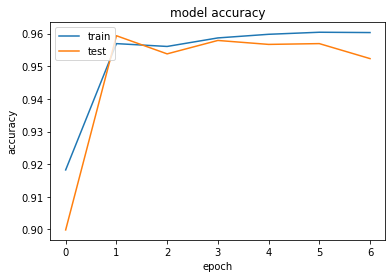

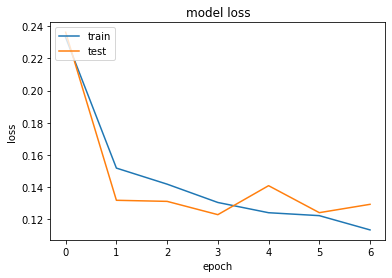

In [131]:
import matplotlib.pyplot as plt
plt.plot(model3_fit.history['accuracy'])
plt.plot(model3_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model3_fit.history['loss'])
plt.plot(model3_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [132]:
score = model3.evaluate(eval_gen, verbose=0)

In [133]:
print("Accuracy of evaluation data is ",score[1])

Accuracy of evaluation data is  0.9408133625984192


In [134]:
preds = model3.predict(eval_gen)
class_one = preds > 0.5

345/345 [==============================] - 14s 40ms/step


In [135]:
print(classification_report(eval_gen.labels, class_one))

              precision    recall  f1-score   support

           0       0.49      0.49      0.49      1377
           1       0.49      0.49      0.49      1377

    accuracy                           0.49      2754
   macro avg       0.49      0.49      0.49      2754
weighted avg       0.49      0.49      0.49      2754



In [136]:
print(confusion_matrix(eval_gen.labels, class_one))

[[673 704]
 [697 680]]
